# **Análisis exploratorio visual de la distribución de los datos**

In [1]:
import os
import sys
from google.colab import drive
# Enlazar a la carpeta 'data'
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/ICBF/data')
sys.path.insert(0, '../scripts/0_utils')
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/ICBF/data


In [2]:
# Librerias relevantes
import time
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
# Opciones de visualización
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

### **Leer archivos**

In [3]:
t0 = time.time()
# Abre el diccionario con la estructura de datos definida
with open('datatypes_dictionaries/dtypes_vars_toma.json', 'r') as file:
  dtypes_vars_toma = json.load(file)
with open('datatypes_dictionaries/dtypes_sociodemo.json', 'r') as file:
  dtypes_soc = json.load(file)
# Lee la tabla de datos nutricionales normalizada con los identificadores correctos
tom = pd.read_parquet('clean_data/tomas_nutricionales.parquet')
tom = tom.astype(dtypes_vars_toma)
tom.info()
# Lee la tabla de datos sociodemográficos limpia
soc = pd.read_parquet('clean_data/sociodemo.parquet')
soc = soc.astype(dtypes_soc)
soc.info()
# Lee la tabla de datos de los beneficiarios limpia
ben = pd.read_parquet('clean_data/beneficiario.parquet')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19084096 entries, 0 to 19084095
Data columns (total 33 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   IdToma                          UInt32        
 1   Registro                        UInt32        
 2   Vigencia                        category      
 3   Toma                            category      
 4   Servicio                        category      
 5   FechaValoracionNutricional      datetime64[ns]
 6   EdadMeses                       float32       
 7   FechaMedicionPerimetroBraquial  datetime64[ns]
 8   MedicionPerimetroBraquial       float32       
 9   Peso                            float32       
 10  Talla                           float32       
 11  ZScoreTallaEdad                 float32       
 12  ZScorePesoEdad                  float32       
 13  ZScorePesoTalla                 float32       
 14  ZScoreIMC                       float32       
 

In [4]:
# Opcional: Conserva solo una muestra aleatoria de n = 1 millón de registros
# Utilizar random_state = entero, para asegurar repetibilidad
tom_sample = tom.sample(n=1000000, random_state=12)

In [5]:
tom_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 15675309 to 8513733
Data columns (total 33 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   IdToma                          1000000 non-null  UInt32        
 1   Registro                        1000000 non-null  UInt32        
 2   Vigencia                        1000000 non-null  category      
 3   Toma                            1000000 non-null  category      
 4   Servicio                        1000000 non-null  category      
 5   FechaValoracionNutricional      994831 non-null   datetime64[ns]
 6   EdadMeses                       999977 non-null   float32       
 7   FechaMedicionPerimetroBraquial  244624 non-null   datetime64[ns]
 8   MedicionPerimetroBraquial       251256 non-null   float32       
 9   Peso                            999992 non-null   float32       
 10  Talla                           999

### **Distribución de z-scores**

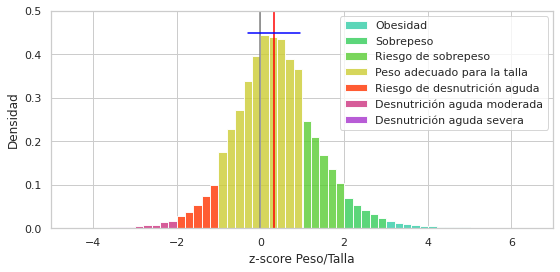

In [6]:
s, t = -5, 7
median = tom_sample["ZScorePesoTalla"].median()
q1 = tom_sample["ZScorePesoTalla"].quantile(0.25)
q3 = tom_sample["ZScorePesoTalla"].quantile(0.75)
# Lista de categorías
l = list(tom_sample["EstadoPesoTalla"].cat.categories)
l.reverse()
# Tamaño de la figura
plt.rcParams["figure.figsize"] = (9, 4)
# Tema
sns.set(style="whitegrid")
color = ['#a633cc', '#cc3380', '#ff3300', '#cccc33', '#59cc33', '#33cc59', '#33cca6']
g = sns.histplot(data=tom_sample, 
                 x="ZScorePesoTalla", hue="EstadoPesoTalla", 
                 stat="density", common_bins=False,
                 binwidth=0.2, palette=color, fill=True, alpha=0.8
                 )
ax = g.axes
ax.set_xlim(s, t)
ax.set_ylim(0, 0.5)
ax.set_xlabel('z-score Peso/Talla')
ax.set_ylabel('Densidad')
ax.legend(labels=l, loc='upper right')
plt.axvline(0, color='gray')
plt.axvline(median, color='red')
ax.axhline(0.45, (q1-s)/(t-s), (q3-s)/(t-s), color='blue')
plt.show()

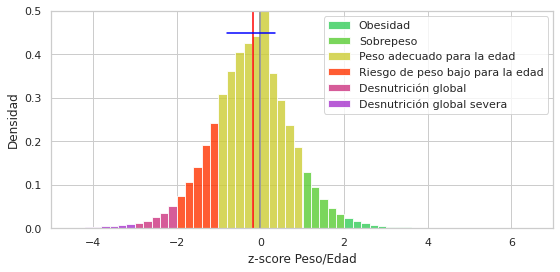

In [7]:
median = tom_sample["ZScorePesoEdad"].median()
q1 = tom_sample["ZScorePesoEdad"].quantile(0.25)
q3 = tom_sample["ZScorePesoEdad"].quantile(0.75)
# Lista de categorías
l = list(tom_sample["EstadoPesoEdad"].cat.categories)
l.reverse()
# Número de categorías
num_cat = len(tom_sample["EstadoPesoEdad"].cat.categories)
# Tamaño de la figura
plt.rcParams["figure.figsize"] = (9, 4)
# Tema
sns.set(style="whitegrid")
color = ['#a633cc', '#cc3380', '#ff3300', '#cccc33', '#59cc33', '#33cc59', '#33cca6']
g = sns.histplot(data=tom_sample, 
                 x="ZScorePesoEdad", hue="EstadoPesoEdad", 
                 stat="density", common_bins=False, legend=True,
                 binwidth=0.2, palette=color[:num_cat], fill=True, alpha=0.8
                 )
ax = g.axes
ax.set_xlim(s, t)
ax.set_ylim(0, 0.5)
ax.set_xlabel('z-score Peso/Edad')
ax.legend(labels=l, loc='upper right')
ax.set_ylabel('Densidad')
plt.axvline(0, color='gray')
plt.axvline(median, color='red')
ax.axhline(0.45, (q1-s)/(t-s), (q3-s)/(t-s), color='blue')
plt.show()

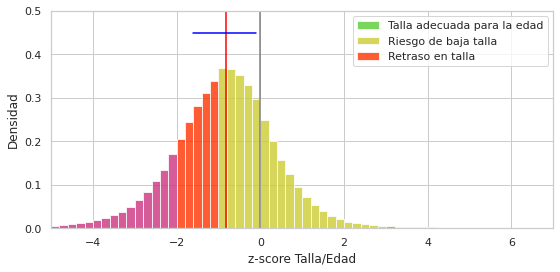

In [8]:
median = tom_sample["ZScoreTallaEdad"].median()
q1 = tom_sample["ZScoreTallaEdad"].quantile(0.25)
q3 = tom_sample["ZScoreTallaEdad"].quantile(0.75)
# Lista de categorías
l = list(tom_sample["EstadoTallaEdad"].cat.categories)[:-1]
l.reverse()
# Número de categorías
num_cat = len(tom_sample["EstadoTallaEdad"].cat.categories)
# Tamaño de la figura
plt.rcParams["figure.figsize"] = (9, 4)
# Tema
sns.set(style="whitegrid")
color = ['#cc3380', '#ff3300', '#cccc33', '#59cc33', '#33cc59', '#33cca6']
g = sns.histplot(data=tom_sample, 
                 x="ZScoreTallaEdad", hue="EstadoTallaEdad", 
                 stat="density", common_bins=False, legend=True,
                 binwidth=0.2, palette=color[:num_cat], fill=True, alpha=0.8
                 )
ax = g.axes
ax.set_xlim(s, t)
ax.set_ylim(0, 0.5)
ax.set_xlabel('z-score Talla/Edad')
ax.legend(labels=l, loc='upper right')
ax.set_ylabel('Densidad')
plt.axvline(0, color='gray')
plt.axvline(median, color='red')
ax.axhline(0.45, (q1-s)/(t-s), (q3-s)/(t-s), color='blue')
plt.show()

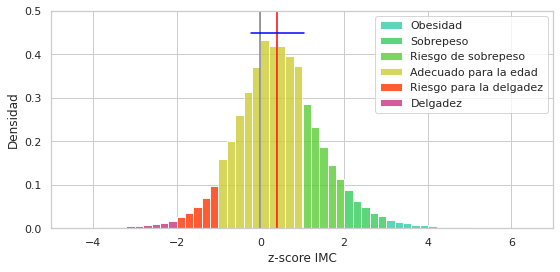

In [9]:
median = tom_sample["ZScoreIMC"].median()
q1 = tom_sample["ZScoreIMC"].quantile(0.25)
q3 = tom_sample["ZScoreIMC"].quantile(0.75)
# Lista de categorías
l = list(tom_sample["EstadoIMC"].cat.categories)
l.reverse()
# Número de categorías
num_cat = len(tom_sample["EstadoIMC"].cat.categories)
# Tamaño de la figura
plt.rcParams["figure.figsize"] = (9, 4)
# Tema
sns.set(style="whitegrid")
color = ['#cc3380', '#ff3300', '#cccc33', '#59cc33', '#33cc59', '#33cca6']
g = sns.histplot(data=tom_sample, 
                 x="ZScoreIMC", hue="EstadoIMC", 
                 stat="density", common_bins=False, legend=True,
                 binwidth=0.2, palette=color[:num_cat], fill=True, alpha=0.8
                 )

ax = g.axes
ax.set_xlim(s, t)
ax.set_ylim(0, 0.5)
ax.set_xlabel('z-score IMC')
ax.legend(labels=l, loc='upper right')
ax.set_ylabel('Densidad')
plt.axvline(0, color='gray')
plt.axvline(median, color='red')
ax.axhline(0.45, (q1-s)/(t-s), (q3-s)/(t-s), color='blue')
plt.show()

### **Distribución de la edad en meses**

#### **En general**

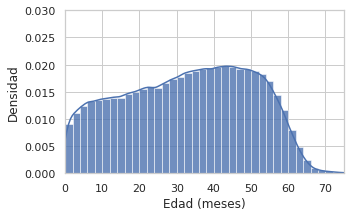

In [10]:
# Tamaño de la figura
plt.rcParams["figure.figsize"] = (5, 3)
# Tema
sns.set(style="whitegrid")
color = ['#cc3380', '#ff3300', '#cccc33', '#59cc33', '#33cc59', '#33cca6']
g = sns.histplot(data=tom_sample, 
                 x="EdadMeses",  kde=True,
                 stat="density", common_bins=False, legend=True,
                 binwidth=2, palette=color[3], fill=True, alpha=0.8
                 )
ax = g.axes
ax.set_xlim(0,75)
ax.set_ylim(0,0.03)
ax.set_xlabel('Edad (meses)')
#ax.legend(loc='upper right')
ax.set_ylabel('Densidad')
plt.show()

#### **Discriminada por sexo**

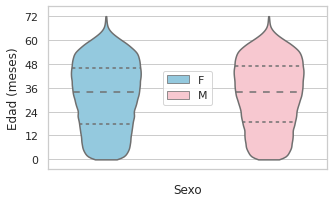

In [11]:
tom_sample['Sexo'] = tom_sample['Sexo'].cat.set_categories(['F', 'M'])
tom_sample = tom_sample[(tom_sample['EdadMeses'] >= 0) & 
                        (tom_sample['EdadMeses'] <= 72)]
# Tamaño de la figura
plt.rcParams["figure.figsize"] = (5, 3)
# Tema
sns.set(style="whitegrid")
from matplotlib.ticker import MultipleLocator
g = sns.violinplot(x='Sexo', y='EdadMeses', hue='Sexo', data = tom_sample, 
                   width=1.5, cut=0, palette=['skyblue', 'pink'], legend=False,
                   showmedians=True, positions=[0.4, 0.6],  inner="quartile")
ax = g.axes
ax.set_ylim(-5,77)
ax.set_xlim(-1, 2)
ax.set_ylabel('Edad (meses)')
ax.set_xlabel('Sexo')
ax.legend(loc='center')
ax.set(xticklabels=[])
ax.yaxis.set_major_locator(MultipleLocator(12))
plt.show()

### **Perímetro braquial**

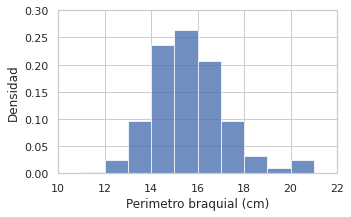

In [12]:
# Tamaño de la figura
plt.rcParams["figure.figsize"] = (5, 3)
# Tema
sns.set(style="whitegrid")
color = ['#cc3380', '#ff3300', '#cccc33', '#59cc33', '#33cc59', '#33cca6']
g = sns.histplot(data=tom_sample, 
                 x="MedicionPerimetroBraquial",
                 stat="density", common_bins=False, legend=True,
                 binwidth=1, palette=color[3], fill=True, alpha=0.8
                 )
ax = g.axes
ax.set_xlim(10,22)
ax.set_ylim(0,0.3)
ax.set_xlabel('Perimetro braquial (cm)')
#ax.legend(loc='upper right')
ax.set_ylabel('Densidad')
plt.show()

#### **Relación con la talla**

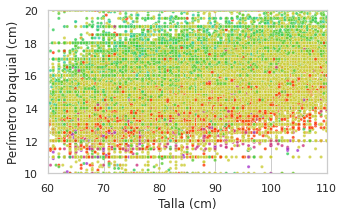

In [13]:
# Tamaño de la figura
plt.rcParams["figure.figsize"] = (5, 3)
# Tema
sns.set(style="whitegrid")
color = ['#a633cc', '#cc3380', '#ff3300', '#cccc33', '#59cc33', '#33cc59', '#33cca6']
g = sns.scatterplot(data=tom_sample, 
                 x="Talla", y='MedicionPerimetroBraquial', hue='EstadoPesoTalla',
                 palette=color, s=10, alpha=0.8, legend=False
                 )
ax = g.axes
ax.set_xlim(60,110)
ax.set_ylim(10,20)
ax.set_xlabel('Talla (cm)')
#ax.legend(loc='upper left')
ax.set_ylabel('Perímetro braquial (cm)')
plt.show()

### **Relación entre el peso y la talla**

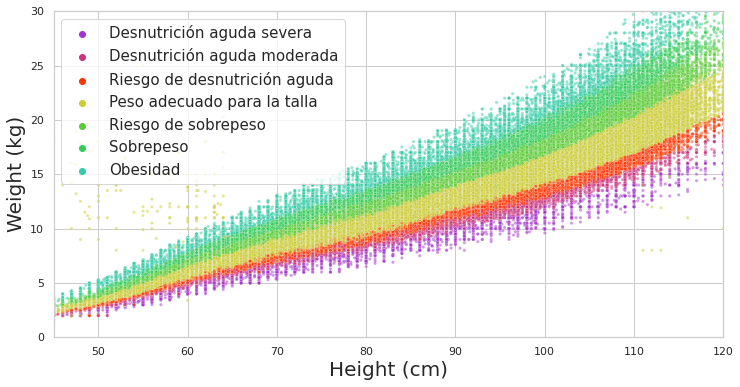

In [14]:
# Tamaño de la figura
plt.rcParams["figure.figsize"] = (12, 6)
# Tema
sns.set(style="whitegrid")
#color = ['#a633cc', '#cc3380', '#ff3300', '#cccc33', '#59cc33', '#33cc59', '#33cca6']
g = sns.scatterplot(data=tom_sample, 
                 x="Talla", y='Peso', hue='EstadoPesoTalla',
                 palette=color, s=10, alpha=0.5
                 )
ax = g.axes
ax.set_xlim(45,120)
ax.set_ylim(0,30)
ax.set_ylabel('Weight (kg)', fontsize=20)
ax.set_xlabel('Height (cm)', fontsize=20)
ax.legend(loc='upper left', fontsize=15)
plt.show()

### **Datos faltantes**

#### **En tabla de datos nutricionales**

In [15]:
na_counts = tom.isna().mean().reset_index()
na_counts.columns = ['column', 'NA_fraction']
na_counts['column'] = na_counts['column'].str.replace('','')

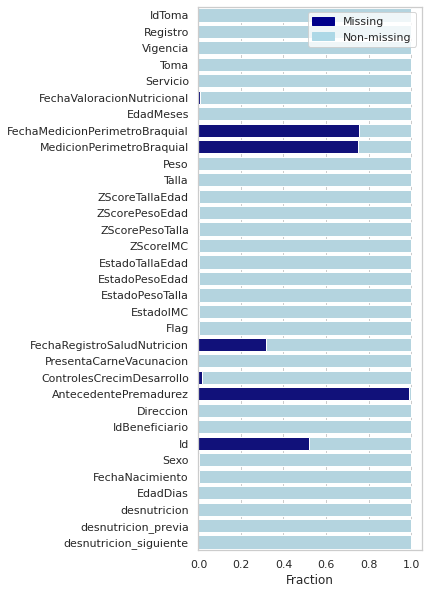

In [16]:
plt.figure(figsize=(4,10))
# Total = 1
bar1 = sns.barplot(y="column", x= [1] * len(na_counts), data=na_counts, color='lightblue')
# Missing = NA_fraction
bar2 = sns.barplot(y="column",  x="NA_fraction", data=na_counts, color='darkblue')
# Add legend
top_bar = mpatches.Patch(color='darkblue', label='Missing')
bottom_bar = mpatches.Patch(color='lightblue', label='Non-missing')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel('Fraction')
plt.ylabel('')
# Show the graph
plt.show()

#### **En tabla de datos sociodemográficos**

In [17]:
soc_reduced = soc[soc.columns]
na_counts = soc_reduced.isna().mean().reset_index()
na_counts.columns = ['column', 'NA_fraction']
na_counts

column  NA_fraction
0                   Cod_clase     0.000000
1          Ind_grupo_sisben_4     0.000000
2          Ind_nivel_sisben_4     0.000000
3                Tip_vivienda     0.000000
4           Ind_tiene_energia     0.000000
5    Ind_tiene_alcantarillado     0.000000
6               Ind_tiene_gas     0.000000
7       Ind_tiene_recoleccion     0.000000
8         Ind_tiene_acueducto     0.000000
9          n_hogares_vivienda     0.000000
10         Tip_ocupa_vivienda     0.000000
11           Ind_tiene_cocina     0.000000
12           Ind_tiene_nevera     0.000000
13         Ind_tiene_lavadora     0.000000
14               Ind_tiene_pc     0.000000
15         Ind_tiene_internet     0.000000
16           n_personas_hogar     0.000000
17                       Sexo     0.000000
18       Ind_ninguna_discapac     0.000000
19             Tip_seg_social     0.000000
20           Ind_acudio_salud     0.887240
21     Ind_fue_atendido_salud     0.903748
22          Tip_cuidado_ninos     0.000000
23          Ind_recibe_comida     0.290945
24          Ind_leer_escribir     0.709055
25                Ind_estudia     0.000000
26         privado_logro_educ     0.000000
27           privado_analfabe     0.000000
28       privado_inasistencia     0.000000
29             privado_rezago     0.000000
30        privado_primera_inf     0.000000
31        privado_trabajo_inf     0.000000
32       privado_desemp_largo     0.000000
33       privado_trabajo_info     0.000000
34           privado_aseguram     0.000000
35       privado_acceso_salud     0.000000
36               privado_agua     0.000000
37            privado_excreta     0.000000
38              privado_suelo     0.000000
39              privado_pared     0.000000
40             privado_hacina     0.000000
41              n_privaciones     0.000000
42      IndicadorPobrezaMulti     0.000000
43         ingresos_promP_imp     0.000000
44            gasto_ppers_imp     0.000000
45       gasto_alim_ppers_imp     0.000000
46            porc_gasto_alim     0.000000
47             union_temprana     0.000000
48                    n_ninos     0.000000
49                   Tip_hijo     0.000000
50                  Jefat_fem     0.000000
51                Tip_familia     0.000000
52            Genera_ingresos     0.000000
53           Nivel_educ_padre     0.382751
54           Nivel_educ_madre     0.045607
55              anno_encuesta     0.000000
56              Uni_dias_agua     0.000000
57    Ind_afec_evento_natural     0.000000
58      n_afec_evento_natural     0.000000
59          Edad_padres_mayor     0.000000
60          Edad_padres_menor     0.000000
61  Comparte_cocina_sanitario     0.000000
62                    Estrato     0.000000
63                   cod_mpio     0.000000
64                   cod_dpto     0.000000
65            FechaNacimiento     0.000000
66                         Id     0.000000
67             IdBeneficiario     0.000000

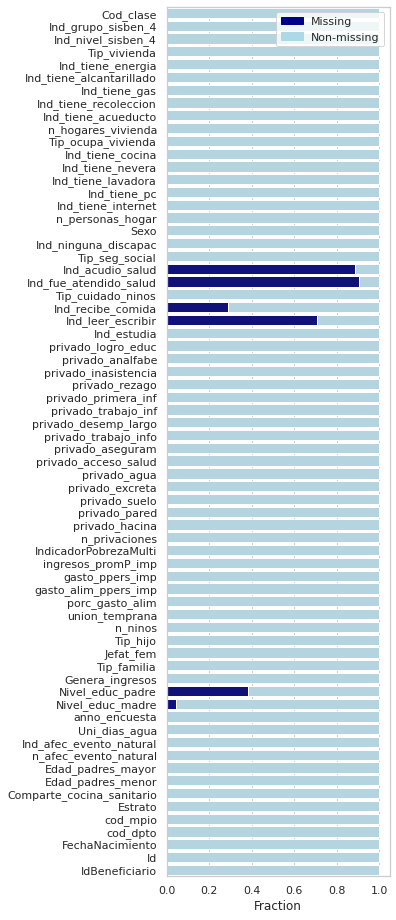

In [18]:
plt.figure(figsize=(4,16))
# Total = 1
bar1 = sns.barplot(y="column", x= [1] * len(na_counts), data=na_counts, color='lightblue')
# Missing = NA_fraction
bar2 = sns.barplot(y="column",  x="NA_fraction", data=na_counts, color='darkblue')
# Add legend
top_bar = mpatches.Patch(color='darkblue', label='Missing')
bottom_bar = mpatches.Patch(color='lightblue', label='Non-missing')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel('Fraction')
plt.ylabel('')
# Show the graph
plt.show()

### **Distribuciones por zona de ubicación**

In [20]:
tom = tom.merge(ben[['ZonaUbicacion', 'PresentaDiscapacidad', 'IdBeneficiario']], 
                       on='IdBeneficiario', how='left')
tom_cabecera = tom.query("ZonaUbicacion == 'CABECERA'").sample(n=500)
tom_resto = tom.query("ZonaUbicacion == 'RESTO'").sample(n=500)
tom_zona = pd.concat([tom_cabecera, tom_resto])
y = tom_zona["ZonaUbicacion"]
del tom_cabecera, tom_resto

In [21]:
def estandarizar(x, media, sd):
  return (x - media) / sd
plt.rcParams["figure.figsize"] = (9, 2.5)
sns.set_style("whitegrid", {'axes.grid' : False})
def graficar_zona(var):
  media, sd = tom_zona[var].mean(), tom_zona[var].std()
  z = tom_zona[var].apply(lambda x: estandarizar(x, media, sd))
  z = z[(z > -3) & (z < 3)]
  fig, ax = plt.subplots()
  sns.histplot(x=z, hue=y, binwidth=0.25, stat='density', ax=ax)
  sns.kdeplot(x=z, hue=y, bw_method=0.25, ax=ax)
  ax.grid(False)
  ax.set_xlim(-3, 3)
  ax.set_ylim(0, 0.35)
  ax.set_xlabel(f'Standardized "{var}"')
  ax.axvline(z[y == 'CABECERA'].median(), color='blue')
  ax.axvline(z[y == 'RESTO'].median(), color='red')
  ax.set_ylabel('Density')
  plt.show()

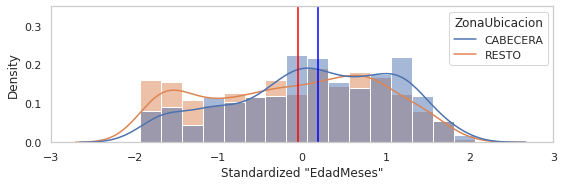

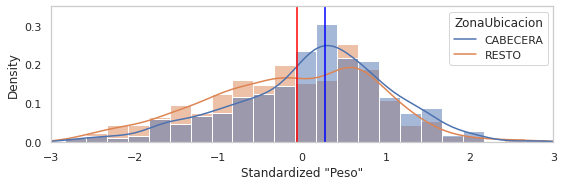

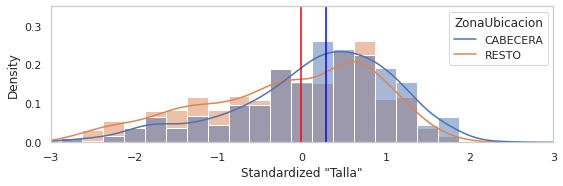

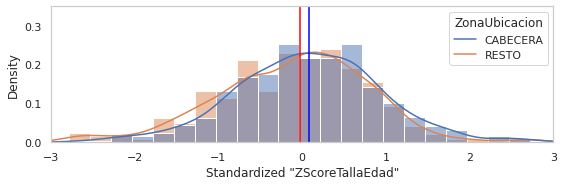

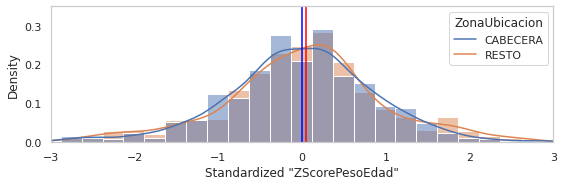

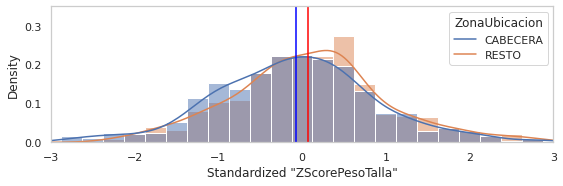

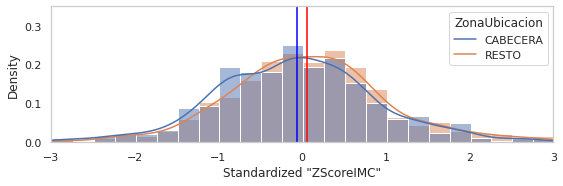

In [22]:
vars = ['EdadMeses', 'Peso', 'Talla', 
        'ZScoreTallaEdad', 'ZScorePesoEdad',
        'ZScorePesoTalla', 'ZScoreIMC']
for var in vars:
   graficar_zona(var)

### **Distribuciones por presencia de discapacidad**

In [23]:
tom_si_discapacidad = tom.query("PresentaDiscapacidad == 'SI'").sample(n=400)
tom_no_discapacidad = tom.query("PresentaDiscapacidad == 'NO'").sample(n=400)
tom_discapacidad = tom_si_discapacidad.append(tom_no_discapacidad)
y = tom_discapacidad["PresentaDiscapacidad"]
del tom_si_discapacidad, tom_no_discapacidad

In [24]:
def graficar_discapacidad(var):
  media, sd = tom_discapacidad[var].mean(), tom_discapacidad[var].std()
  z = tom_discapacidad[var].apply(lambda x: estandarizar(x, media, sd))
  z = z[(z > -3) & (z < 3)]
  fig, ax = plt.subplots()
  sns.histplot(x=z, hue=y, binwidth=0.25, stat='density', ax=ax)
  sns.kdeplot(x=z, hue=y, bw_method=0.25, ax=ax)
  ax.grid(False)
  ax.set_xlim(-3, 3)
  #ax.set_ylim(0, 0.45)
  ax.set_xlabel(f'Standardized "{var}"')
  ax.axvline(z[y == 'NO'].median(), color='blue')
  ax.axvline(z[y == 'SI'].median(), color='red')
  ax.set_ylabel('Density')
  plt.show()

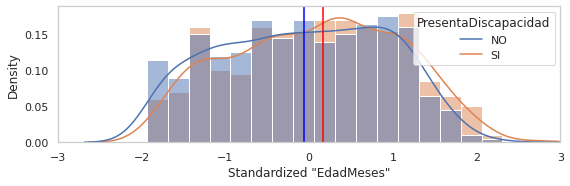

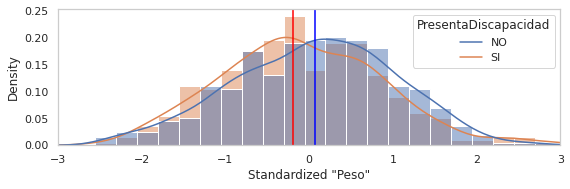

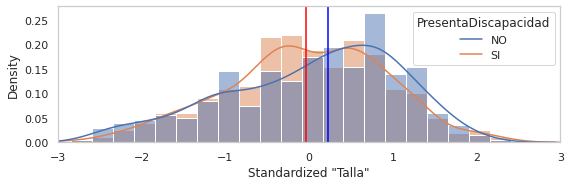

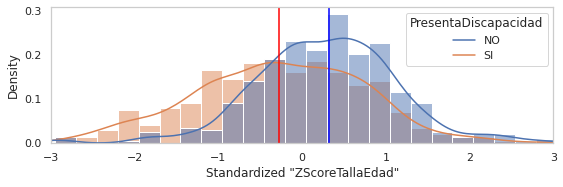

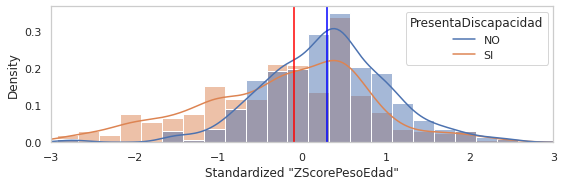

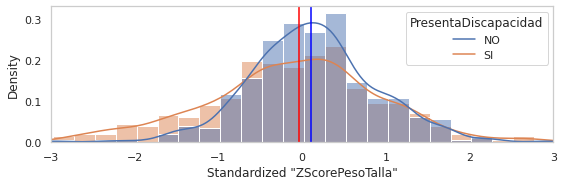

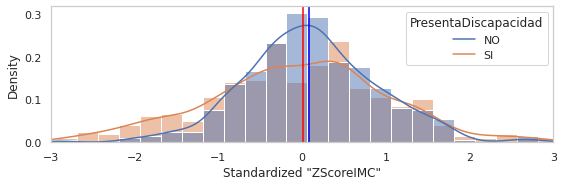

In [25]:
for var in vars:
   graficar_discapacidad(var)

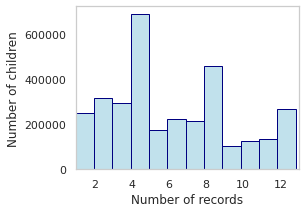

In [26]:
y = tom.groupby('IdBeneficiario')['desnutricion'].count()
plt.rcParams["figure.figsize"] = (4, 3)
fig = sns.histplot(y, bins=y.max(), color='lightblue', edgecolor='navy', linewidth=1)
fig.set_xlabel(f'Number of records')
fig.set_ylabel(f'Number of children')
fig.set_xlim(1, 13)
plt.show()